In [1]:
import pandas as pd

In [2]:

df = pd.read_csv('iter.csv')


In [3]:
df


,Refs,Reads
0,ACCATAATGCGTGGGGCCGACCTCGGAATGCGGTCTCCATGCGCGT...,CACCATAATGCGTGGGGCCGACCTCGGAATGCGGTCTCCATGCGCG...
1,TCGAAGCAGTAGGGCCTACCAAATAGGTTGGTCCTCCGTTGTATCT...,TCGAAGCAGTAGGGCCTACCAAATAGGTTGGTCCTCCGTTGTATCT...
2,AGTTAACGTCCCACGGCGAGGCACTCTTGATCCCCACCTTCAAGAG...,AGTTAACGTCCCACGGCGAGGCACTCTTGATCCCCACCTTCAAGAG...
3,GCCCAAGGGTACGCCCGCAGCGACGCAATTGGCGGAGTAAGCGCGT...,GCCCAAGGGTACGCCCGCAGCGACGCAATTGGCGGAGTAAGCGCGT...
4,GCACTGATGTAACTCATGGTACATCCGTCGCTGAGCGCCATTTTGT...,GCACTGATGTAACTCATGGTACATCCGTCGCTGAGCGCCATTTTGT...
...,...,...
9995,GCATGATTTGGAAGGTCGGCACTATACCCACCCAGGGTATATGGTC...,GCATGATTTGGAAGGTCGGCACTATACCCACCCAGGGTATATGGTC...
9996,GAAGTTTGGAACGTGTTCGTCCGCCAATTAAGGTTGGCTTCTAGTA...,GAAGTTTGGAACGTGTTCGTCCGCCAATTAAGGTTGGCTTCTAGTA...
9997,TGCATCCCGGACAACCGCAAGGGTGCATGGGCACCGCAATTCCCAA...,TGCATCCCGGACAACCGCAAGGGTGCATGGGCACCGCAATTCCCAA...
9998,ACTGGACGTCCTATGCTGGCATAATGAAACGACAACCTGTCTTCGA...,ACTGGACGTCCTATGCTGGCATAATGAAACGACAACCTGTCTTCGA...


In [4]:
from tqdm import tqdm


In [5]:
noisy_strands = [s.strip() for s in list(df['Reads'])]


In [6]:
ref_strands = [s.strip() for s in list(df['Refs'])]


In [7]:
import difflib


In [8]:
import matplotlib.pyplot as plt
import numpy as np
import os

# use LaTeX fonts in the plot
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
os.environ["PATH"] += os.pathsep + '/usr/local/texlive/2021basic/bin/universal-darwin'

In [9]:
def print_diff(ref_strand, noisy_strand):
    global pairs
    global pairs_no_pos
    a, b = 0, 0

    # quadratic time, no heuristics
    for match in difflib.SequenceMatcher(None, ref_strand, noisy_strand, autojunk=False).get_matching_blocks():
        was = ref_strand[a:match.a]
        now = noisy_strand[b:match.b]
        
        a = match.a + match.size
        b = match.b + match.size
        
        if was == '' and now == '':
            pass
        else:
            # print('{}|{}'.format(was, now), end=', ')
            pairs += [(was, now, match.a)]
            pairs_no_pos += [(was, now)]



100%|██████████| 10000/10000 [00:00<00:00, 64559.84it/s]


[104, 262, 402, 425, 429, 469, 446, 461, 475, 479, 470, 514, 507, 510, 540, 539, 538, 534, 547, 562, 581, 574, 601, 580, 603, 613, 616, 638, 652, 633, 654, 686, 669, 675, 688, 690, 725, 717, 696, 737, 751, 744, 755, 772, 788, 813, 803, 815, 782, 813, 839, 845, 825, 853, 866, 873, 848, 854, 879, 919, 909, 902, 924, 909, 973, 967, 946, 949, 978, 987, 989, 1011, 1026, 1038, 1015, 1019, 1034, 1055, 1058, 1064, 1056, 1095, 1064, 1090, 1122, 1135, 1126, 1140, 1132, 1125, 1141, 1144, 1179, 1198, 1190, 1214, 1235, 1207, 1263, 1218, 1252, 1253, 1282, 1294, 1256, 1291, 1298, 1315, 1320, 2187]


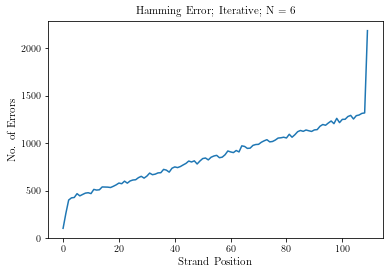

In [10]:
# Hamming Distance Graph
strand_len = 110
count_pos = [0] * (strand_len + 1)

def hamming(ref_strand, recons_strand):
    for i, (c1, c2) in enumerate(zip(ref_strand, recons_strand)):
        if c1 != c2:
            count_pos[i] += 1

for i in tqdm(range(len(ref_strands))):
    hamming(ref_strands[i], noisy_strands[i])

print(count_pos[:-1])
f = plt.figure()
plt.plot(range(strand_len), count_pos[:-1])
plt.title(r'Hamming Error; Iterative; N = 6', fontsize=11)
plt.xlabel(r'Strand Position', fontsize=11)
plt.ylabel(r'No. of Errors', fontsize=11)
plt.show()
f.savefig('cov6-iter-hamming.pdf', bbox_inches='tight')

In [11]:
pairs = []
pairs_no_pos = []

for i in tqdm(range(len(ref_strands))):
    if ref_strands[i] != noisy_strands[i]:
        print_diff(ref_strands[i], noisy_strands[i])


100%|██████████| 10000/10000 [00:02<00:00, 3501.30it/s]


In [12]:

subs_no_pos, counts_no_pos = np.unique(pairs_no_pos, return_counts=True, axis=0)
sorting = np.argsort(counts_no_pos)
subs_no_pos = subs_no_pos[sorting]
counts_no_pos = counts_no_pos[sorting]

for sub, count in zip(subs_no_pos, counts_no_pos):
    if count > 5:
        print("{} -> {}".format(sub[0], sub[1]), count)


G -> A 13
G -> C 17
C ->  20
G -> T 20
A -> G 28
A -> T 28
A -> C 30
T ->  32
C -> G 56
C -> T 59
T -> G 64
C -> A 70
T -> A 70
T -> C 73
A ->  173
G ->  190
 -> T 469
 -> A 569
 -> C 621
 -> G 671


 -> T @ 88 6
 -> G @ 103 6
 -> T @ 2 6
 -> C @ 82 6
 -> T @ 51 6
 -> A @ 47 6
 -> T @ 44 6
 -> A @ 46 6
 -> C @ 42 6
 -> T @ 36 6
 -> T @ 17 6
 -> G @ 39 6
 -> T @ 39 6
 -> C @ 60 6
 -> G @ 60 6
 -> G @ 97 6
 -> G @ 67 6
 -> G @ 92 6
 -> C @ 63 6
 -> A @ 72 6
 -> T @ 96 6
 -> C @ 14 6
 -> G @ 8 6
 -> C @ 106 6
 -> G @ 84 6
 -> T @ 69 7
 -> G @ 11 7
 -> A @ 96 7
 -> C @ 70 7
 -> G @ 33 7
T ->  @ 110 8
 -> G @ 34 8
 -> C @ 23 8
 -> G @ 102 8
C ->  @ 110 8
 -> T @ 0 12
G -> A @ 110 13
 -> T @ 1 14
G -> C @ 110 16
 -> A @ 2 16
G -> T @ 110 20
 -> A @ 110 20
A -> G @ 110 28
A -> C @ 110 28
 -> G @ 2 28
A -> T @ 110 28
 -> C @ 110 28
 -> T @ 110 36
 -> C @ 2 37
 -> G @ 110 42
 -> C @ 1 48
 -> G @ 1 48
C -> G @ 110 54
C -> T @ 110 58
T -> G @ 110 61
 -> A @ 1 66
T -> A @ 110 69
C -> A @ 110 69
T -> C @ 110 70
 -> C @ 109 94
 -> A @ 0 96
 -> G @ 0 96
 -> T @ 109 97
 -> C @ 0 98
 -> G @ 109 143
 -> A @ 109 145
A ->  @ 110 162
G ->  @ 110 176
[302, 180, 90, 16, 16, 7, 5, 13, 14, 12, 13, 15, 13, 

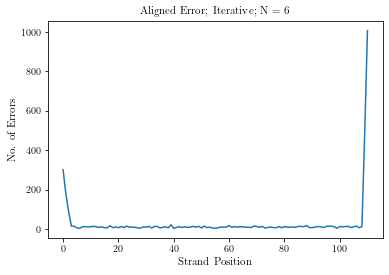

In [13]:
subs, counts = np.unique(pairs, return_counts=True, axis=0)
sorting = np.argsort(counts)
subs = subs[sorting]
counts = counts[sorting]

for sub, count in zip(subs, counts):
    if count > 5:
        print("{} -> {} @ {}".format(sub[0], sub[1], sub[2]), count)

strand_len = 110
pos_counts = [0] * (strand_len + 1)
for sub, count in zip(subs, counts):
    pos_counts[int(sub[2])] += count

print(pos_counts)

f = plt.figure()
plt.plot(range(strand_len + 1), pos_counts)
plt.title(r'Aligned Error; Iterative; N = 6', fontsize=11)
plt.xlabel(r'Strand Position', fontsize=11)
plt.ylabel(r'No. of Errors', fontsize=11)
plt.show()
f.savefig('cov6-iter-aligned.pdf', bbox_inches='tight')

In [14]:
subs, counts = np.unique(pairs, return_counts=True, axis=0)
sorting = np.argsort(counts)
subs = subs[sorting]
counts = counts[sorting]


In [15]:
def get_key(char1, char2):
    char1 = char1 if char1 != '' else '_'
    char2 = char2 if char2 != '' else '_'
    return char1 + ' -> ' + char2

strand_len = 110
pos_map = {}
pos_counts = [0] * (strand_len + 1)
for sub, count in zip(subs, counts):
    key = get_key(sub[0], sub[1])
    if key not in pos_map:
        pos_map[key] = [0] * (strand_len + 1)
    pos_map[key][int(sub[2])] += count

In [16]:
sub_keys = [get_key(sub[0], sub[1]) for sub in subs_no_pos]
max_10_keys = sub_keys[-10:]
max_10_counts = counts_no_pos[-10:]


[96, 48, 28, 4, 5, 5, 0, 2, 6, 2, 3, 7, 5, 4, 1, 1, 2, 4, 3, 2, 2, 3, 1, 2, 4, 4, 5, 1, 1, 2, 2, 3, 3, 7, 8, 2, 3, 2, 2, 6, 1, 2, 1, 2, 4, 1, 3, 2, 2, 3, 0, 1, 4, 4, 1, 1, 2, 5, 2, 2, 6, 0, 3, 2, 3, 1, 4, 6, 4, 3, 2, 2, 4, 1, 3, 3, 0, 2, 4, 2, 3, 4, 1, 3, 6, 3, 3, 2, 2, 2, 3, 5, 6, 4, 2, 4, 1, 6, 1, 0, 4, 5, 8, 6, 2, 2, 4, 2, 3, 143, 42]
[98, 48, 37, 4, 2, 1, 3, 5, 3, 3, 2, 1, 4, 2, 6, 2, 2, 4, 3, 4, 3, 2, 2, 8, 4, 2, 1, 3, 2, 4, 3, 5, 2, 3, 2, 2, 0, 3, 2, 5, 2, 2, 6, 0, 2, 3, 2, 3, 5, 4, 1, 4, 2, 3, 2, 1, 2, 3, 3, 4, 6, 3, 2, 6, 3, 5, 5, 1, 1, 5, 7, 3, 2, 1, 3, 4, 2, 3, 2, 2, 2, 4, 6, 1, 3, 5, 3, 3, 5, 4, 2, 3, 1, 3, 3, 3, 2, 4, 5, 1, 2, 3, 1, 5, 1, 3, 6, 0, 3, 94, 28]
[96, 66, 16, 2, 3, 1, 0, 2, 3, 3, 3, 2, 1, 2, 2, 1, 1, 4, 1, 2, 1, 4, 2, 3, 2, 2, 2, 0, 1, 2, 1, 1, 1, 0, 1, 0, 1, 1, 1, 4, 1, 4, 2, 1, 1, 5, 6, 6, 1, 2, 4, 5, 1, 3, 1, 1, 1, 2, 1, 3, 2, 2, 4, 1, 1, 2, 0, 2, 3, 2, 0, 1, 6, 1, 2, 2, 2, 1, 3, 2, 3, 1, 1, 4, 0, 4, 3, 5, 5, 1, 0, 2, 3, 2, 0, 2, 7, 4, 3, 2, 4, 2, 1, 3, 4, 3,

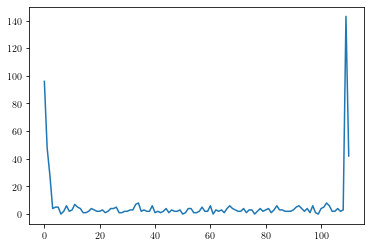

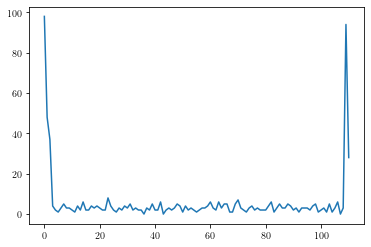

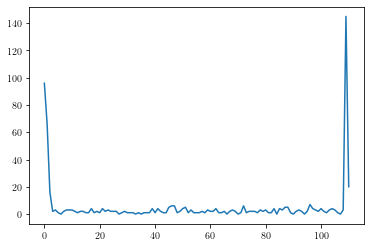

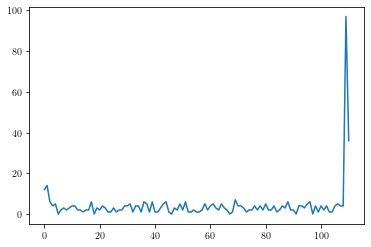

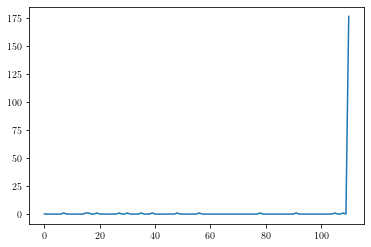

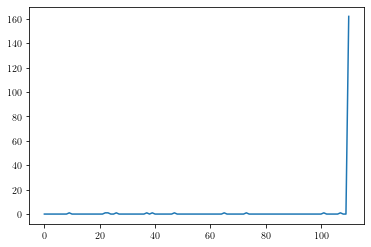

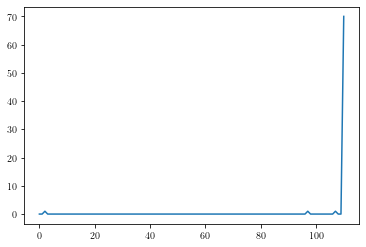

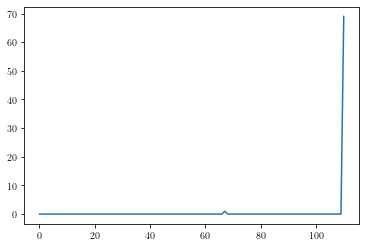

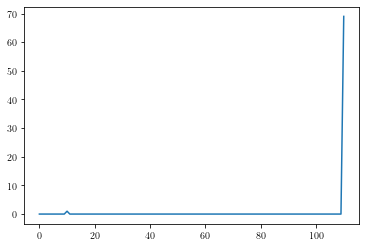

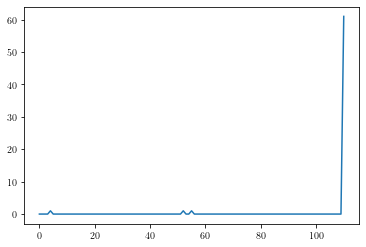

In [17]:
for key, count in zip(reversed(max_10_keys), reversed(max_10_counts)):
    plt.figure(key)
    print(pos_map[key])
    plt.plot(range(strand_len + 1), pos_map[key])

In [18]:
np.save('subs.npy', subs)
np.save('counts.npy', counts)